## DNN 与 selu 激活函数

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [3]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train.astype(np.float32))

StandardScaler()

In [4]:
# X_train_std = std_scaler.transform(X_train.astype(np.float32)).reshape(X_train.shape[0],28,28)
# X_valid_std = std_scaler.transform(X_valid.astype(np.float32)).reshape(X_valid.shape[0],28,28)
# X_test_std = std_scaler.transform(X_test.astype(np.float32)).reshape(X_test.shape[0],28,28)

In [5]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

2021-07-25 17:10:49.668949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.keras.optimizers.Optimizer?

In [7]:
logdir='./dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

2021-07-25 17:10:51.324093: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:10:51.324279: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:10:51.325190: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [10]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [11]:
X_train.shape

(55000, 784)

In [12]:
history = model.fit(X_train, y_train, epochs=5,
         validation_data=(X_valid, y_valid),
                   callbacks=callbacks)

2021-07-25 17:10:51.815898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
   3/1719 [..............................] - ETA: 6:38 - loss: 2.5336 - accuracy: 0.1771 

2021-07-25 17:11:03.865005: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:11:03.865042: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:11:03.885956: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-25 17:11:03.908734: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-25 17:11:03.930073: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-selu-callbacks/train/plugins/profile/2021_07_25_17_11_03
2021-07-25 17:11:03.937436: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./dnn-selu-callbacks/train/plugins/profile/2021_07_25_17_11_03/simodeMacBook-Pro.local.trace.json.gz
2021-07-25 17:11:04.025027: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-selu-callbacks/train/plugins/

1719/1719 [==============================] - 36s 14ms/step - loss: 0.6674 - accuracy: 0.7657 - val_loss: 0.4287 - val_accuracy: 0.8504
Epoch 2/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.5041 - accuracy: 0.8213 - val_loss: 0.3916 - val_accuracy: 0.8586
Epoch 3/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4634 - accuracy: 0.8346 - val_loss: 0.3884 - val_accuracy: 0.8606
Epoch 4/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.4268 - accuracy: 0.8468 - val_loss: 0.3490 - val_accuracy: 0.8728
Epoch 5/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.4036 - accuracy: 0.8543 - val_loss: 0.3502 - val_accuracy: 0.8700


In [13]:
history.history

{'loss': [0.6673904061317444,
  0.5040763020515442,
  0.46341270208358765,
  0.42683300375938416,
  0.4035903811454773],
 'accuracy': [0.7656727433204651,
  0.821254551410675,
  0.8346182107925415,
  0.8468363881111145,
  0.85430908203125],
 'val_loss': [0.4286717176437378,
  0.39163869619369507,
  0.38838401436805725,
  0.34896382689476013,
  0.3502413034439087],
 'val_accuracy': [0.8503999710083008,
  0.8586000204086304,
  0.8605999946594238,
  0.8727999925613403,
  0.8700000047683716]}

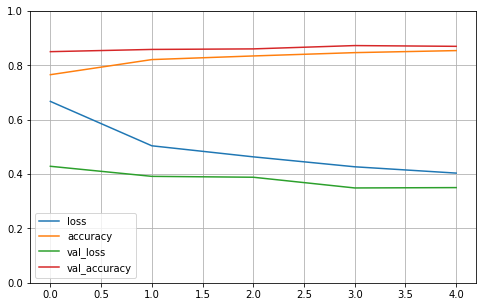

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [15]:
model.evaluate(X_test_std,y_test)

NameError: name 'X_test_std' is not defined